In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Titanic data analysis

In [6]:
titanic_data = sns.load_dataset('titanic')
titanic_data

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


Died -> : 549
Survived -> : 342


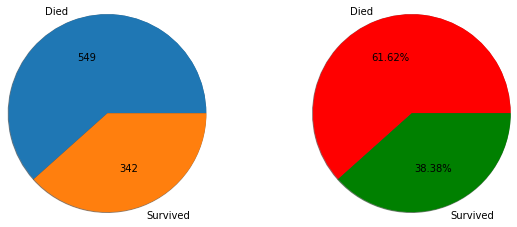

In [86]:
'''
         How many people survived the disaster ?
'''
# b=sns.FacetGrid(titanic_data)
plt.figure(figsize=(10,2))
plt.subplot(2,2,1)
plt.pie(titanic_data['survived'].value_counts(),autopct=lambda x: '{:.0f}'.format(x*891/100),labels=['Died','Survived'],radius=5,shadow=True,explode=(0.01,0))
plt.subplot(2,2,2)
plt.pie(titanic_data['survived'].value_counts(),colors=['r','g'],autopct='%1.2f%%',labels=['Died','Survived'],shadow=True,explode=(0.01,0),radius=5)
print('Died -> : {}\nSurvived -> : {}'.format(titanic_data['survived'].value_counts()[0],titanic_data['survived'].value_counts()[1]))

plt.show()

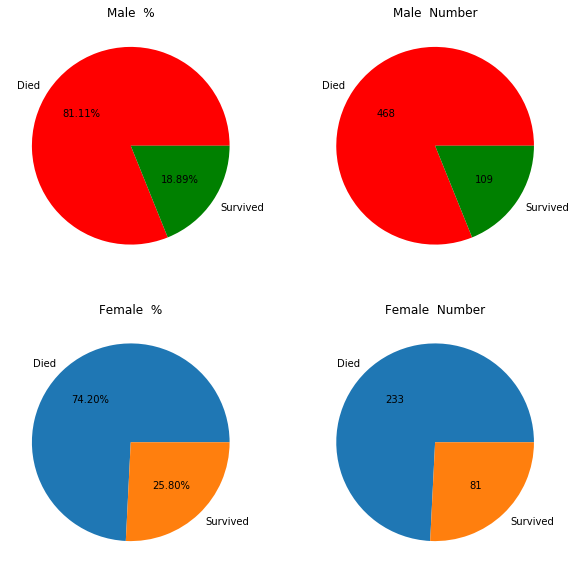

In [259]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.title('Male  %')
plt.pie(titanic_data[titanic_data['sex']=='male']['survived'].value_counts(),colors=['r','g'],labels=['Died','Survived'],radius=1,autopct='%1.2f%%')
plt.subplot(2,2,2)
plt.title('Male  Number')
plt.pie(titanic_data[titanic_data['sex']=='male']['survived'].value_counts(),colors=['r','g'],labels=['Died','Survived'],radius=1,autopct=lambda x: '{:.0f}'.format(x*titanic_data[titanic_data['sex']=='male'][['survived']].count()[0]/100))
plt.subplot(2,2,3)
plt.title('Female  %')
plt.pie(titanic_data[titanic_data['sex']=='female']['survived'].value_counts(),labels=['Died','Survived'],radius=1,autopct='%1.2f%%')
plt.subplot(2,2,4)
plt.title('Female  Number')
plt.pie(titanic_data[titanic_data['sex']=='female']['survived'].value_counts(),labels=['Died','Survived'],radius=1,autopct=lambda x: '{:.0f}'.format(x*titanic_data[titanic_data['sex']=='female'][['survived']].count()[0]/100))
plt.show()


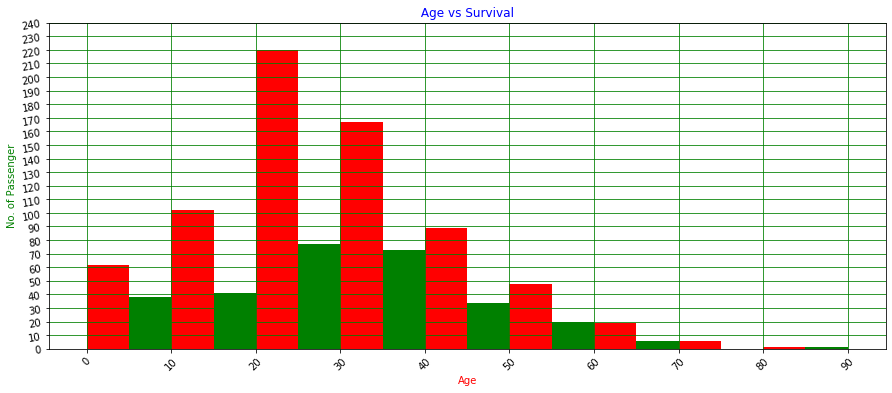

In [315]:
'''
         Does age play a role?
'''
plt.figure(figsize=(15,6))
plt.hist(titanic_data[titanic_data['survived']==1]['age'],bins=range(0,100,10),color=['g'])
plt.hist(titanic_data['age'],bins=range(0,100,10),color=['r'],width=5)
plt.xticks(range(0,100,10),rotation=45)
plt.yticks(range(0,250,10),rotation=10)
plt.title(' Age vs Survival ',color='b')
plt.xlabel('Age',color='r')
plt.ylabel('No. of Passenger',color='g')
plt.grid(color='g')
plt.show()

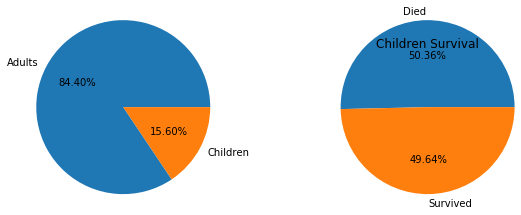

In [343]:
titanic_data['child']=titanic_data['age'].map(lambda x: 1 if x<=18 else 0)
plt.figure(figsize=(10,2))
plt.subplot(1,2,1)
plt.pie(titanic_data['child'].value_counts(),labels=['Adults','Children'],autopct='%1.2f%%',radius=2)
plt.subplot(1,2,2)
plt.pie(titanic_data[titanic_data['child']==1]['survived'].value_counts(),autopct='%1.2f%%',labels=['Died','Survived'],radius=2)
plt.title('Children Survival')
plt.show()